In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml # mnist data setini yüklemek için gerekli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784")

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
def showimage (dframe,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

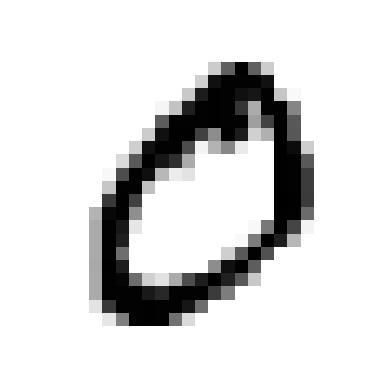

In [8]:
showimage(mnist.data,1)

In [9]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0 )

In [10]:
test_img_copy = test_img.copy()

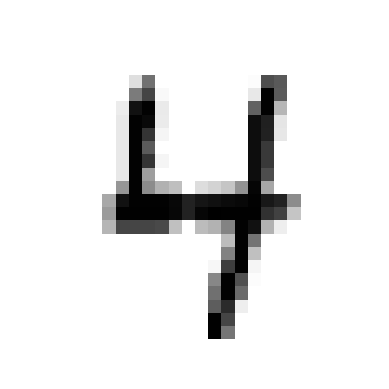

In [11]:
showimage(test_img_copy,1)

In [16]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [17]:
pca = PCA(.95)

In [18]:
pca.fit(train_img)

PCA(n_components=0.95)

In [19]:
print(pca.n_components_)

327


In [20]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [21]:
logisticRegr = LogisticRegression(solver = "lbfgs", max_iter = 10000)

In [25]:
logisticRegr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

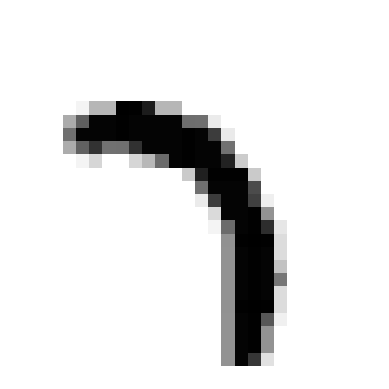

In [43]:
showimage(test_img_copy, 9)

In [44]:
logisticRegr.predict(test_img[9].reshape(1,-1))

array(['7'], dtype=object)

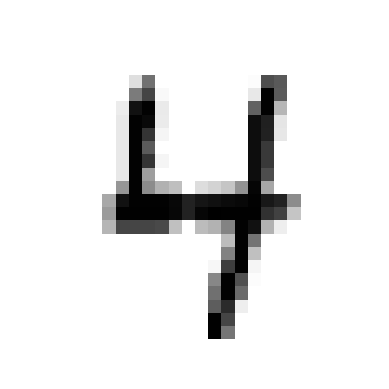

In [40]:
showimage(test_img_copy, 1)

In [41]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

In [42]:
logisticRegr.score(test_img,test_lbl)

0.9183